In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Step 2: Load data
train = pd.read_csv("/content/drive/MyDrive/twitter_training.csv", header=None,
                    names=["id", "topic", "sentiment", "text"])
val = pd.read_csv("/content/drive/MyDrive/twitter_validation.csv", header=None,
                  names=["id", "topic", "sentiment", "text"])

print("Training shape:", train.shape)
print("Validation shape:", val.shape)

train.head()


Training shape: (74682, 4)
Validation shape: (1000, 4)


,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

In [3]:
# Step 3: Check missing values
print(train.isnull().sum())
print(val.isnull().sum())


id             0
topic          0
sentiment      0
text         686
dtype: int64
id           0
topic        0
sentiment    0
text         0
dtype: int64


In [4]:
train = train.dropna(subset=["text", "sentiment"])
val = val.dropna(subset=["text", "sentiment"])


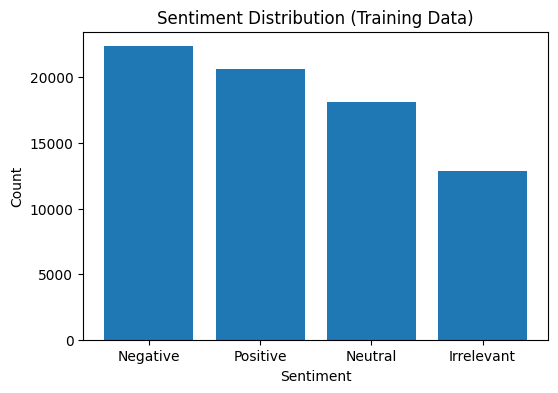

,count
sentiment,
Negative,22358
Positive,20655
Neutral,18108
Irrelevant,12875


In [5]:
# Step 4: Sentiment distribution
sent_counts = train["sentiment"].value_counts()

plt.figure(figsize=(6,4))
plt.bar(sent_counts.index, sent_counts.values)
plt.title("Sentiment Distribution (Training Data)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

sent_counts


In [6]:
train["topic"].value_counts().head(10)


,count
topic,
LeagueOfLegends,2377
MaddenNFL,2377
CallOfDuty,2376
Verizon,2365
TomClancysRainbowSix,2364
Facebook,2362
Microsoft,2361
Dota2,2359
WorldOfCraft,2357


In [7]:
import re

def clean_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"#[A-Za-z0-9_]+", " ", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

train["clean_text"] = train["text"].apply(clean_text)
val["clean_text"] = val["text"].apply(clean_text)

train[["text", "clean_text"]].head()


,text,clean_text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder yo...


from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('clean_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['clean_text'].value_counts()
    for x_label, grp in _df_4.groupby('text')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('text')
_ = plt.ylabel('clean_text')

In [8]:
# Step 6: Prepare X, y
X_train = train["clean_text"]
y_train = train["sentiment"]

X_test = val["clean_text"]
y_test = val["sentiment"]


In [9]:
# Step 7: TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

X_train_vec.shape, X_test_vec.shape


((73996, 5000), (1000, 5000))

In [10]:
# Step 8: Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [11]:
# Step 9: Predictions on validation data
y_pred = model.predict(X_test_vec)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy on validation data:", acc)

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy on validation data: 0.819

Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.81      0.71      0.76       172
    Negative       0.78      0.89      0.83       266
     Neutral       0.88      0.78      0.82       285
    Positive       0.81      0.86      0.84       277

    accuracy                           0.82      1000
   macro avg       0.82      0.81      0.81      1000
weighted avg       0.82      0.82      0.82      1000



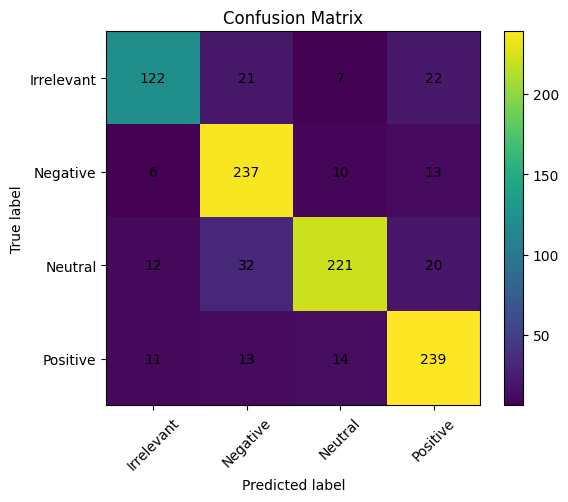

array([[122,  21,   7,  22],
       [  6, 237,  10,  13],
       [ 12,  32, 221,  20],
       [ 11,  13,  14, 239]])

In [12]:
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())

plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j],
                 ha="center", va="center")

plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.show()

cm


In [13]:
topic_sent_counts = train.groupby(["topic", "sentiment"]).size().unstack(fill_value=0)
topic_sent_counts.head()


sentiment,Irrelevant,Negative,Neutral,Positive
topic,,,,
Amazon,186,575,1207,308
ApexLegends,192,591,936,634
AssassinsCreed,264,375,156,1439
Battlefield,915,464,351,586
Borderlands,240,426,597,1017


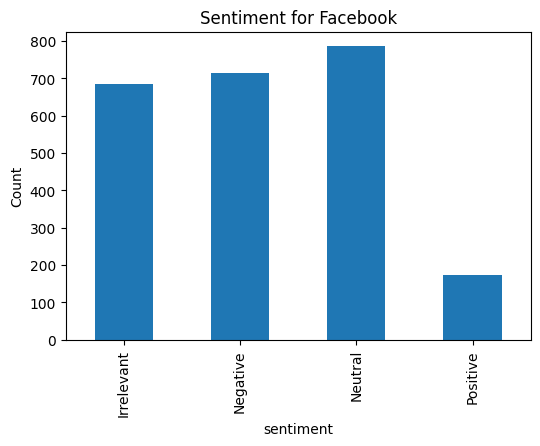

In [14]:
topic_name = "Facebook"
topic_sent_counts.loc[topic_name].plot(kind="bar", figsize=(6,4))
plt.title(f"Sentiment for {topic_name}")
plt.ylabel("Count")
plt.show()


In [15]:
def predict_sentiment(sentence):
    cleaned = clean_text(sentence)
    vec = tfidf.transform([cleaned])
    return model.predict(vec)[0]

print(predict_sentiment("I love this product, it is amazing!"))
print(predict_sentiment("This service is terrible and I hate it."))


Positive
Negative
